In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


In [3]:
# Load Wine Quality dataset from Kaggle
df = pd.read_csv('winequality-red.csv')

In [4]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:

# If there were missing values, we could fill them or drop rows. For simplicity, let's assume there are no missing values.

# Standardize features (important for visualizing)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('quality', axis=1)), columns=df.columns[:-1])

# Add the 'quality' column back to the scaled dataframe
df_scaled['quality'] = df['quality']


In [7]:
# Create a custom colormap using a list of colors
colors = ['#ff9999', '#ff6666', '#ff3333', '#ff0000', '#990000', '#660000', '#330000', '#000000', '#0000ff', '#3399ff']

# Define custom colormap
cmap = ListedColormap(colors)

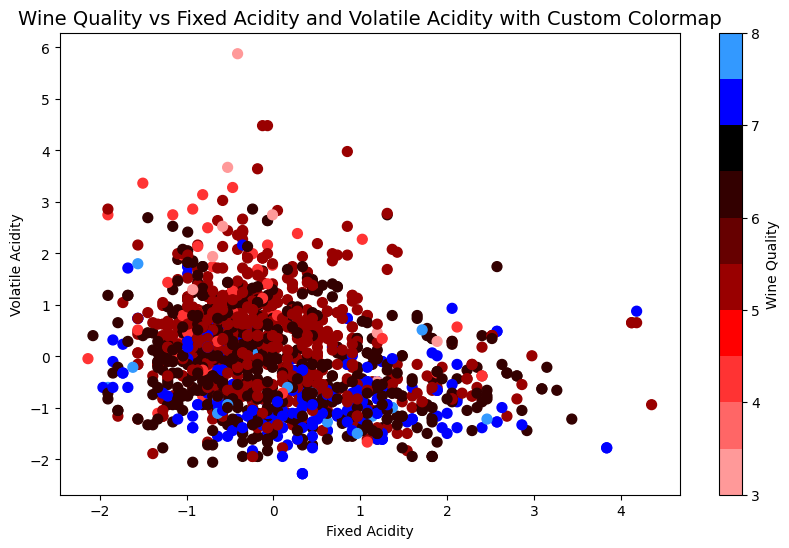

In [8]:
# Create a scatter plot for the first two features with the custom colormap
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['quality'], cmap=cmap, s=50)
plt.title("Wine Quality vs Fixed Acidity and Volatile Acidity with Custom Colormap", fontsize=14)
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.colorbar(label='Wine Quality')
plt.show()

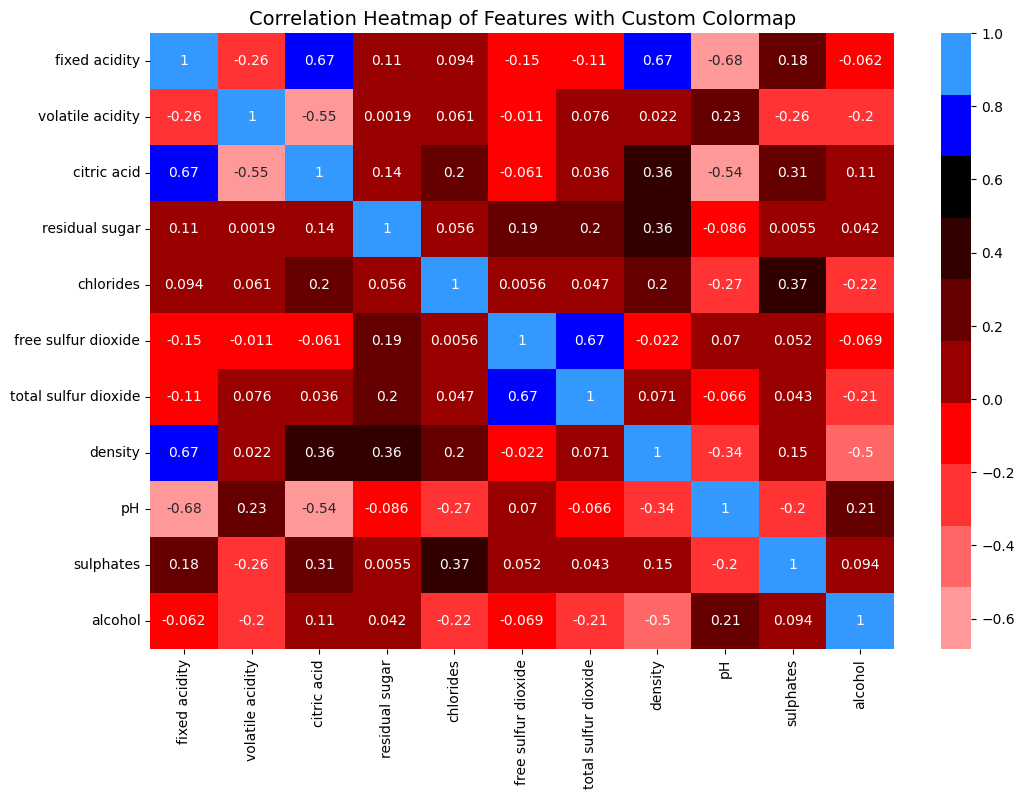

In [9]:
# Create a heatmap of all features with custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.drop('quality', axis=1).corr(), annot=True, cmap=cmap)
plt.title("Correlation Heatmap of Features with Custom Colormap", fontsize=14)
plt.show()
